# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [ ]:
#seu código aqui
X_train = pd.read_csv('X_train_balanced.csv')
y_train = pd.read_csv('y_train_balanced.csv')

In [ ]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
print("Tamanho de X_train: ", X_train.shape)

Tamanho de X_train:  (252, 10)


In [ ]:
print("Tamanho de y_train: ", y_train.shape)

Tamanho de y_train:  (252, 1)


In [ ]:
print("Tamanho de X_test: ", X_test.shape)

Tamanho de X_test:  (41, 10)


In [ ]:
print("Tamanho de y_test: ", y_test.shape)

Tamanho de y_test:  (41, 1)


In [ ]:
print(y_train.value_counts())

CreditScore_Encoded
0                      84
1                      84
2                      84
Name: count, dtype: int64


In [ ]:
print(X_train.value_counts())

Age  Income  Number of Children  HomeOwnership_Encoded  MaritalStatus_Encoded  Gender_Encoded  Education_Bachelor's Degree  Education_Doctorate  Education_High School Diploma  Education_Master's Degree
29   27.5    0                   1                      1                      0               False                        False                True                           False                        16
28   32.5    0                   1                      1                      0               False                        False                False                          False                        11
33   52.5    0                   1                      1                      1               False                        False                True                           False                        10
27   37.5    0                   1                      1                      0               False                        False                True                         

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Bom a árvore de decisãio é um modelo de aprendizado de máquina que usa perguntas para dividir os dados em subconjuntos conseguindo assim prever, utilizamos o método Gini ou Entropia para escolher as melhores perguntas que irão fazer a divisão de dados mais eficiente, a avaliação do modelo se da tanto pelo precision, quanto pelo recall e pelo F1-score, esses 3 são métricas de avaliação que nos ajudam a entender a eficacia da previsão do modelo, sendo o F1-score uma junção tanto do recall quanto do precision, podemos melhorar nosso modelo entendendo quais features são mais importantes na decisão e ajustando os parâmetros do modelo para se adequar melhor aos nossos dados

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [ ]:
#seu código aqui
arvore_credit = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
arvore_credit.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia: ", acuracia)

Acurácia:  0.975609756097561


Temos uma acurácia muito elevada

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [ ]:
#seu código aqui
y_pred_test = arvore_credit.predict(X_test)

In [ ]:
relatorio = classification_report(y_test, y_pred_test)
print(relatorio)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [ ]:
import plotly.figure_factory as ff

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Definindo nomes de classes
class_names = ['Low', 'Average', 'High']

# Plotando a matriz de confusão com Ploty
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predicted labes',
    yaxis_title='True labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
	)
)

O modelo se saiu maravilhosamente bem, errando apenas 1 vez ao prever Low e ser Average, uma performance melhor do que o Naive Bayes

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

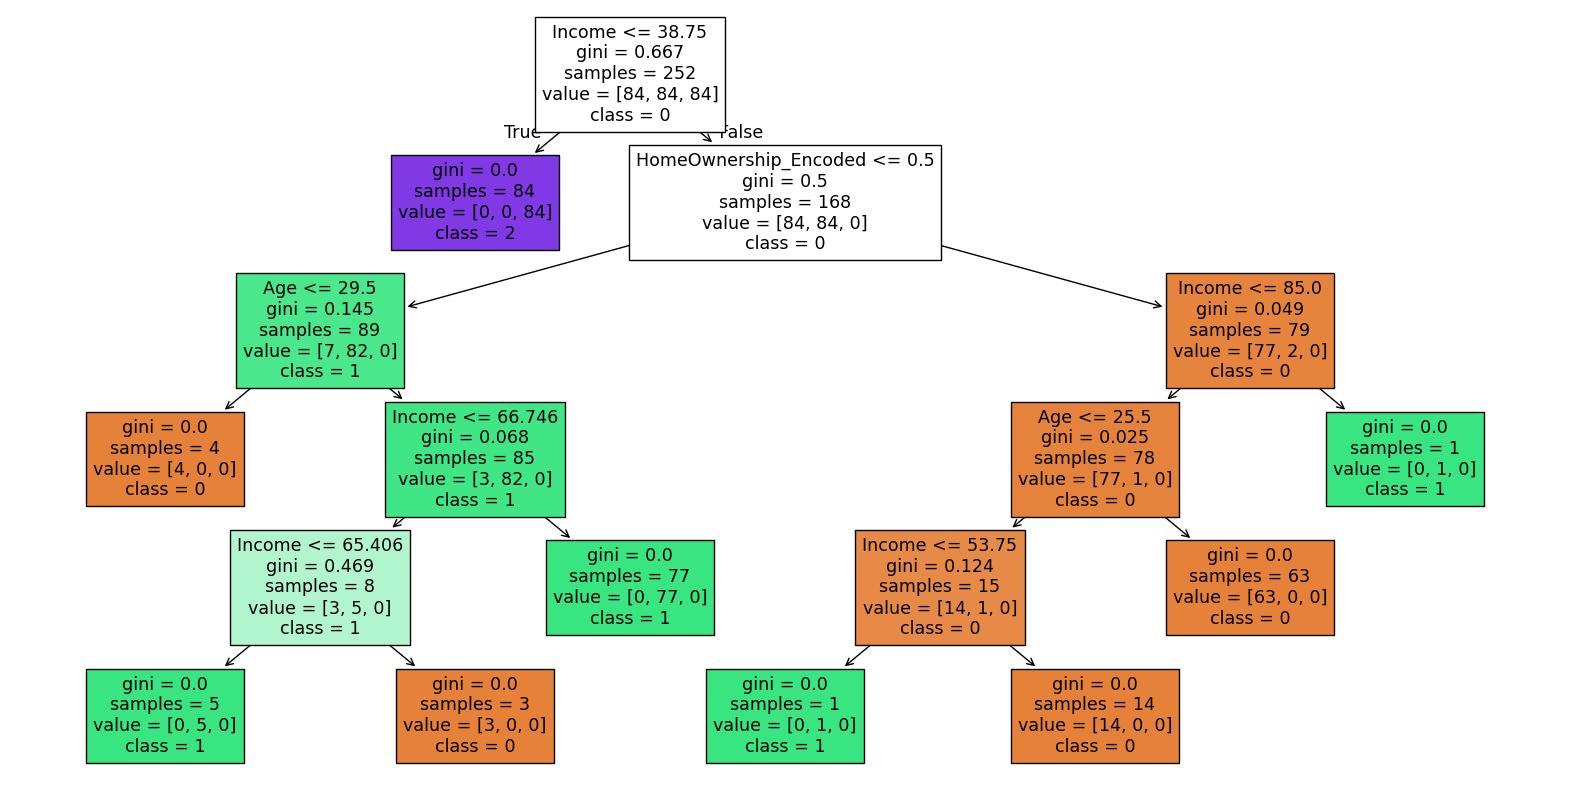

In [ ]:
#seu código aqui
plt.figure(figsize=(20,10))
plot_tree(arvore_credit, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

A profundidade da árvore é de 5 niveis

# 6) Identifique as 2 principais features do modelo.


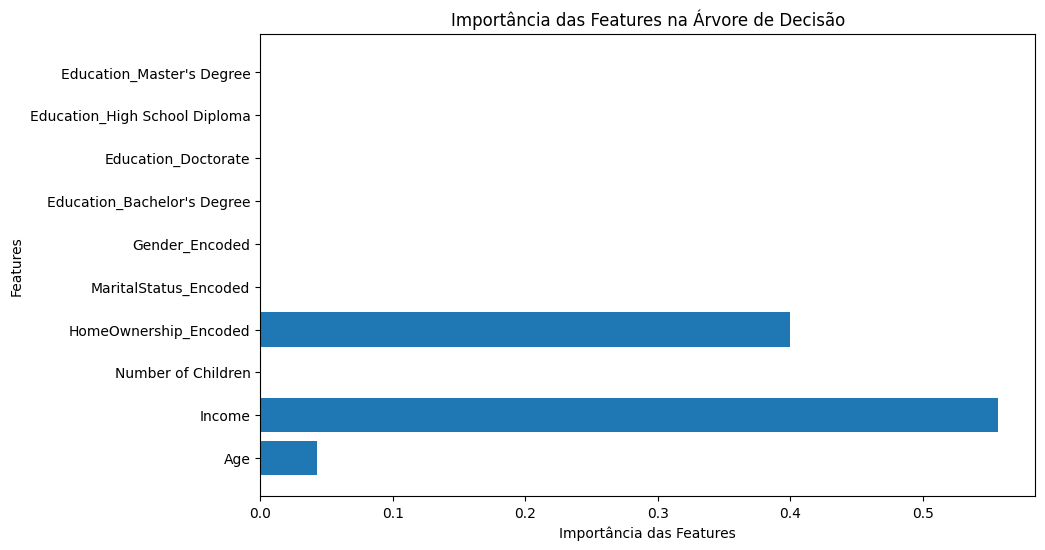

In [ ]:
#seu código aqui
importancias_features = arvore_credit.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()


As 2 principais features são Income e HomeOwnership

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [ ]:
#seu código aqui
X_train_reduzido = X_train[['Income', 'HomeOwnership_Encoded']]
X_test_reduzido = X_test[['Income', 'HomeOwnership_Encoded']]

In [ ]:
arvore_churn_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

In [ ]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00         6

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



In [ ]:

conf_matrix = confusion_matrix(y_test, previsoes_reduzido)

# Definindo nomes de classes
class_names = ['Low', 'Average', 'High']

# Plotando a matriz de confusão com Ploty
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predicted labes',
    yaxis_title='True labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
	)
)

Bom tivemos pouca diferença mas um modelo pior com mais 1 erro, mas em geral um ótimo modelo



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Na minha visão a árvore de decisão se adequa melhor aos dados, errando apenas 1 vez quando utilizamos todos os dados ela tem uma acertividade gigante, acredito que seja por que ela consegue ver uma correlação entre as features, coisa que o naive bayes não consegue